In [66]:
import pandas as pd
import random
pd.options.display.float_format = '{:.2f}'.format
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import os
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [67]:
cwd = os.getcwd()

def header(text): 
    print(f"\033[94m\033[1m", text, f"\033[0m")

# Load Data

In [68]:
# load all existing data
main_folder = cwd + '/Data/Queried'
all_df = []

for root, dirs, files in os.walk(main_folder):
    for file in files:
        if file.endswith('.csv'):
            csv_path = os.path.join(root, file)
            df_i = pd.read_csv(csv_path)
            all_df.append(df_i)
    
main_df = pd.concat(all_df).drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1).reset_index(drop=True)

main_df.fillna('', inplace=True)
main_df['to'] = main_df['address to'] + main_df['contractInteracted']
main_df = main_df.drop(['address to','contractInteracted'],axis=1)

display(main_df.head())
print(main_df.shape)

,flag,address from,timestamp,amount,gasUsed,to
0,1,0xfbb1b73c4f0bda4f67dca266ce6ef42f520fbb98,1524424038,543917300000000000,21000,0xf76dea0a7ed40e379cc834cf94a6bdc59ac11044
1,1,0x1fd6267f0d86f62d88172b998390afee2a1f54b6,1524424522,500000000000000000,21080,0xf76dea0a7ed40e379cc834cf94a6bdc59ac11044
2,1,0x2ce712ff6d92f00c715ade85a00608ec6459482a,1524428551,500000000000000000,21000,0xf76dea0a7ed40e379cc834cf94a6bdc59ac11044
3,1,0xbdea7a6091910e55c22243c01329a75b0816c48b,1524429539,14040560000000000,21000,0xf76dea0a7ed40e379cc834cf94a6bdc59ac11044
4,1,0x583120283281e551f1a3cb5fa13556b19c9a641b,1524431995,510000000000000000,21000,0xf76dea0a7ed40e379cc834cf94a6bdc59ac11044


(18238249, 6)


In [69]:
# load aggregated data
df = pd.read_csv('./Data/merged.csv')
display(df.head())
print(df.shape)

,Address,Flag,Avg_min_between_received_tnx,Avg_min_between_sent_tnx,Sent_tnx,Received_Tnx,Number_of_Created_Contracts,Average_of_Unique_Received_From_Addresses,Average_of_Unique_Sent_To_Addresses,min_value_received,max_value_received,avg_val_received,min_val_sent,max_val_sent,avg_val_sent,total_transactions_including_tnx_to_create_contract,total_Ether_sent,total_ether_received,total_ether_balance
0,0x000000000532b45f47779fce440748893b257865,1,79732364.05,11971.00,3,20,0,20,3,0.00,14.33,5.86,39.04,39.04,39.04,23,117.13,117.13,0.00
1,0x00000000072d54638c2c2a3da3f715360269eea1,1,54346478.60,1281.70,23,30,0,28,17,0.00,208.09,7.17,0.00,82.00,9.39,53,215.97,215.19,-0.77
2,0x0000000009324b6434d7766af41908e4c49ee1d7,1,177169476.00,4494.50,6,9,0,9,3,0.01,100.00,18.25,15.19,39.54,27.37,15,164.21,164.21,0.01
3,0x0000000086c5d614bec59dfd2c9b88f7cb57f23c,1,321374815.60,0.00,1,5,0,5,1,5.00,24.18,10.10,60.50,60.50,60.50,6,60.50,50.50,-10.00
4,0x00000000bf02300fd6251627aa3db8933a0eee83,1,79716222.10,12812.75,4,20,0,17,2,0.00,21.00,4.09,13.18,41.48,25.44,24,101.76,81.77,-19.99


(20302, 19)


In [70]:
# load scraped aggregated data
scraped_aggregated = pd.read_csv('./Data/new_samples_aggregated.csv').drop('Unnamed: 0', axis=1)
scraped_aggregated.rename(columns={'max_value_received': 'max_value_received ',
                                    'avg_value_received': 'avg_val_received',
                                    'min_value_sent': 'min_val_sent',
                                    'max_value_sent': 'max_val_sent',
                                    'avg_value_sent': 'avg_val_sent'}, inplace=True)
display(scraped_aggregated.head())
print(scraped_aggregated.shape)

,Address,Flag,Avg_min_between_received_tnx,Avg_min_between_sent_tnx,Sent_tnx,Received_Tnx,Number_of_Created_Contracts,Average_of_Unique_Received_From_Addresses,Average_of_Unique_Sent_To_Addresses,min_value_received,max_value_received,avg_val_received,min_val_sent,max_val_sent,avg_val_sent,total_transactions_including_tnx_to_create_contract,total_Ether_sent,total_ether_received,total_ether_balance
0,0xD0cC2B24980CBCCA47EF755Da88B220a82291407,1,561.28,997.68,66,21,0,17,47,0.02,266.00,17.49,0.00,183.00,5.56,87,366.92,367.21,0.29
1,0x00e01A648Ff41346CDeB873182383333D2184dd1,1,531.61,29912.53,15,22,0,21,13,0.43,50.00,9.10,0.00,25.00,13.33,37,199.95,200.22,0.27
2,0x240e125c20a4cC84Bd6E7F8D1FD07Aff4c06D43d,1,896.00,0.00,1,4,0,4,1,0.00,1.00,0.48,1.90,1.90,1.90,5,1.90,1.90,0.00
3,0x8A04B6a0223aF79e4aCC0a55c7B166Fe0794269a,1,6332.61,8762.73,18,23,0,19,7,0.00,0.50,0.11,0.01,0.49,0.14,41,2.43,2.44,0.01
4,0x2268751eAFC860781074D25f4bD10DED480310B9,1,81.88,5492.31,53,74,0,63,50,0.00,880.00,15.56,0.00,1150.80,21.72,127,1151.26,1151.30,0.04


(523, 19)


In [71]:
# load all scraped data
scraped_all = pd.read_csv('./Data/new_samples_all.csv', usecols=['from', 'timeStamp', 'value', 'gas', 'to'])
scraped_all['flag'] = 1
scraped_all.rename(columns={'timeStamp': 'timestamp', 'from': 'address from', 'value': 'amount', 'gas': 'gasUsed'}, inplace=True)
display(scraped_all.head())
print(scraped_all.shape)

,timestamp,address from,to,amount,gasUsed,flag
0,1501076489,0xfdd3bfe92735e109726d397007464624a39334d7,0xd0cc2b24980cbcca47ef755da88b220a82291407,11493999000000000000,21000,1
1,1501076866,0xd0cc2b24980cbcca47ef755da88b220a82291407,0xd8711dba2db856eebd7f01db3d877e4c53d6dee2,100000000000000000,21000,1
2,1501077056,0x7e8def9b77417f60a5a6a420573f4580e14e17b1,0xd0cc2b24980cbcca47ef755da88b220a82291407,296901974000000000,21000,1
3,1501077776,0x984a01719fceeedd10c43afca9d4220508e54f1a,0xd0cc2b24980cbcca47ef755da88b220a82291407,361313983000011260,21000,1
4,1501080107,0xd0cc2b24980cbcca47ef755da88b220a82291407,0x86849f631edd436794ec35982f4b5459056190d3,100000000000000000,21000,1


(21057, 6)


In [72]:
# merge all data
main_df = pd.concat([main_df, scraped_all], axis=0)
print(main_df.shape)

# merge aggregated data
df = pd.concat([df, scraped_aggregated], axis=0)
print(df.shape)

(18259306, 6)
(20825, 19)


# Preprocessing

In [73]:
# sampling to reduce imbalance

positive_sample = df[df["Flag"] == 1]
negative_sample = df[df["Flag"] == 0].sample(len(positive_sample), random_state = 23)
data = pd.concat([negative_sample, positive_sample], axis = 0)
y = data["Flag"]
X = data.drop('Flag', axis=1)

df = pd.concat([X, y], axis=1).rename(columns={0:'Flag'})
df['Flag'] = df['Flag'].map({1:True, 0:False})
df = df.sample(frac=1, random_state=42)
del X, y

In [74]:
df.isna().any()

Address                                                False
Avg_min_between_received_tnx                           False
Avg_min_between_sent_tnx                               False
Sent_tnx                                               False
Received_Tnx                                           False
Number_of_Created_Contracts                            False
Average_of_Unique_Received_From_Addresses              False
Average_of_Unique_Sent_To_Addresses                    False
min_value_received                                     False
max_value_received                                     False
avg_val_received                                       False
min_val_sent                                           False
max_val_sent                                           False
avg_val_sent                                           False
total_transactions_including_tnx_to_create_contract    False
total_Ether_sent                                       False
total_ether_received    

In [75]:
df['Flag'].value_counts()

Flag
False    6198
True     6198
Name: count, dtype: int64

# Time Component Preprocessing

In [76]:
def group_time(df, component): 

    time_counts = dict(df[component].value_counts())
    final = [k for k, v in time_counts.items() if v == max(time_counts.values())]
    num = len(time_counts.keys())
    
    return [final, num]


def make_time_components(data, component):
    
    ''' ####################################################################################################################################
    This part generates a dataframe which shows every unique address's list of days/months/hours that it is active,
    and the number of these unique components. '''

    print('#'*50); header('Generating Unique Addresses, List of unique '+component + ' and Number of unique '+component+'...'); print('\n')
    # extract the component for each unique address 
    n = component+'count'
    all_address_unique_comp = pd.DataFrame(sub_df.groupby('address') \
                                           .apply(group_time, component)) \
                                           .reset_index() \
                                           .rename(columns={'index':'address', 0: n})
    all_address_unique_comp[['most_frequent_'+component, 'num_'+component]] = all_address_unique_comp[component+'count'].apply(pd.Series)
    all_address_unique_comp.drop(columns=[component+'count'], inplace=True)
    display(all_address_unique_comp.head()) ; print('\n')
    
    ''' ####################################################################################################################################
    This part reduces the number of unique days/months/hours for addresses that may have equal probabilities of occurrence
    for 2 or more levels. It compares each element in the list with the overall distribution across main_df, to pick the one
    corresponding to the highest occurrence. '''

    print('#'*50); header('Reducing '+component+'...'); print('\n')
    # reduce addresses with > 1 number of most frequent component

    all_address_unique_comp['num_unique_frequent_'+component] = all_address_unique_comp['most_frequent_'+component].apply(lambda x : len(x))
    all_address_unique_comp_greater1 = all_address_unique_comp[all_address_unique_comp['num_unique_frequent_'+component] > 1]
    all_address_unique_comp_others = all_address_unique_comp[all_address_unique_comp['num_unique_frequent_'+component] <= 1]

    reduced_unique_comp = []
    comp_frequencies = main_df[component].value_counts()
    for lists in tqdm(all_address_unique_comp_greater1['most_frequent_'+component].values):
        extract = pd.Series(lists).value_counts()
        v = 0
        for d in lists: 
            if comp_frequencies[d] > v:  final_comp = d; v = comp_frequencies[d]
        reduced_unique_comp.append([final_comp])

    all_address_unique_comp_greater1['most_frequent_'+component] = reduced_unique_comp
    all_address_unique_comp = pd.concat([all_address_unique_comp_greater1, all_address_unique_comp_others], axis=0)
    display(all_address_unique_comp) ; print('\n')

    ''' ####################################################################################################################################
    This part merges the new features for each unique address in df. '''

    print('#'*50); header('Merging with DF...'); print('\n')
    # left join unique_days to df

    df2 = data.merge(all_address_unique_comp[['address', 'most_frequent_'+component, 'num_'+component]], 
                  how='left', left_on='Address', right_on='address').drop('address', axis=1)
    print(f'Number of samples without {component} component:', sum(df2['most_frequent_'+component].isna()), '\n')
    print('Added ' + component + '...')
    # unlist the feature
    df2['most_frequent_'+component].fillna('00', inplace=True)
    df2['most_frequent_'+component] = df2['most_frequent_'+component].apply(lambda x: x[0]).replace('0', np.nan)
    display(df2) ; print('\n')

    ''' ####################################################################################################################################
    This part fills in any missing values for these features based on the overall distribution by using random sampling. '''

    print('#'*50); header('Filling Missing Values with Distribution...'); print('\n')
    # fill in NA following distribution

    labels = df2['most_frequent_'+component].dropna().value_counts(normalize=True).keys()
    probs = df2['most_frequent_'+component].dropna().value_counts(normalize=True).values

    for i in df2[df2['most_frequent_'+component].isna()].index: 
        df2.loc[i, 'most_frequent_'+component]= np.random.choice(labels, 1, p=probs)[0]
        df2.loc[i, 'num_'+component]= 1

    print(f'Number of samples without {component} component:', sum(df2['most_frequent_'+component].isna()), '\n')

    # plot distribution

    from collections import Counter

    comp_counts = Counter(df2['most_frequent_'+component])
    sorted_comp, counts = zip(*comp_counts.most_common())

    plt.bar(sorted_comp, counts)
    for label, count in zip(sorted_comp, counts): plt.text(label, count + 0.1, str(count), ha='center', va='bottom')
    plt.xticks(rotation=45)
    plt.show()

    return df2

In [77]:
# extract relevant dt information 

main_df['datetime'] = pd.to_datetime(main_df['timestamp'], unit='s')
main_df['year'] = main_df['datetime'].dt.year
main_df['month'] = main_df['datetime'].dt.month
main_df['day'] = main_df['datetime'].dt.day_name()
main_df['hour'] = main_df['datetime'].dt.hour
main_df['minute'] = main_df['datetime'].dt.minute
main_df['second'] = main_df['datetime'].dt.second

print(main_df['month'].value_counts())
print('\n')
print(main_df['day'].value_counts())
print('\n')
print(main_df['hour'].value_counts())

month
7     2489848
6     2004631
5     1947875
3     1548253
4     1526587
8     1497257
12    1349503
2     1286086
9     1279204
1     1272135
10    1120331
11     937596
Name: count, dtype: int64


day
Wednesday    2742943
Tuesday      2733694
Friday       2729018
Thursday     2709106
Monday       2563660
Saturday     2412869
Sunday       2368016
Name: count, dtype: int64


hour
16    873601
14    855847
15    851559
18    840181
17    835290
19    823155
20    820481
13    809692
21    801497
22    773162
0     769306
2     748792
12    745172
23    741046
1     736358
3     709982
9     709965
8     708587
10    707787
11    705405
7     686162
4     675377
6     672348
5     658554
Name: count, dtype: int64


In [78]:
display(main_df.head())
print(main_df.shape)

# replicate main_df at the bottom to merge common addresses between 'address_from' and 'to'

to_df = main_df.copy().rename(columns={'address from': 'to', 'to': 'address from'})
sub_df = pd.concat([to_df, main_df.copy()], axis=0)
sub_df.rename(columns={'to':'address'}, inplace=True)
display(sub_df.iloc[18259306:, :].head())
print(sub_df.shape)

,flag,address from,timestamp,amount,gasUsed,to,datetime,year,month,day,hour,minute,second
0,1,0xfbb1b73c4f0bda4f67dca266ce6ef42f520fbb98,1524424038,543917300000000000,21000,0xf76dea0a7ed40e379cc834cf94a6bdc59ac11044,2018-04-22 19:07:18,2018,4,Sunday,19,7,18
1,1,0x1fd6267f0d86f62d88172b998390afee2a1f54b6,1524424522,500000000000000000,21080,0xf76dea0a7ed40e379cc834cf94a6bdc59ac11044,2018-04-22 19:15:22,2018,4,Sunday,19,15,22
2,1,0x2ce712ff6d92f00c715ade85a00608ec6459482a,1524428551,500000000000000000,21000,0xf76dea0a7ed40e379cc834cf94a6bdc59ac11044,2018-04-22 20:22:31,2018,4,Sunday,20,22,31
3,1,0xbdea7a6091910e55c22243c01329a75b0816c48b,1524429539,14040560000000000,21000,0xf76dea0a7ed40e379cc834cf94a6bdc59ac11044,2018-04-22 20:38:59,2018,4,Sunday,20,38,59
4,1,0x583120283281e551f1a3cb5fa13556b19c9a641b,1524431995,510000000000000000,21000,0xf76dea0a7ed40e379cc834cf94a6bdc59ac11044,2018-04-22 21:19:55,2018,4,Sunday,21,19,55


(18259306, 13)


,flag,address,timestamp,amount,gasUsed,address from,datetime,year,month,day,hour,minute,second
0,1,0xfdd3bfe92735e109726d397007464624a39334d7,1501076489,11493999000000000000,21000,0xd0cc2b24980cbcca47ef755da88b220a82291407,2017-07-26 13:41:29,2017,7,Wednesday,13,41,29
1,1,0xd0cc2b24980cbcca47ef755da88b220a82291407,1501076866,100000000000000000,21000,0xd8711dba2db856eebd7f01db3d877e4c53d6dee2,2017-07-26 13:47:46,2017,7,Wednesday,13,47,46
2,1,0x7e8def9b77417f60a5a6a420573f4580e14e17b1,1501077056,296901974000000000,21000,0xd0cc2b24980cbcca47ef755da88b220a82291407,2017-07-26 13:50:56,2017,7,Wednesday,13,50,56
3,1,0x984a01719fceeedd10c43afca9d4220508e54f1a,1501077776,361313983000011260,21000,0xd0cc2b24980cbcca47ef755da88b220a82291407,2017-07-26 14:02:56,2017,7,Wednesday,14,2,56
4,1,0xd0cc2b24980cbcca47ef755da88b220a82291407,1501080107,100000000000000000,21000,0x86849f631edd436794ec35982f4b5459056190d3,2017-07-26 14:41:47,2017,7,Wednesday,14,41,47


(36518612, 13)


# Adding Month Component

##################################################
 Generating Unique Addresses, List of unique month and Number of unique month... 




,address,most_frequent_month,num_month
0,0x0000000000000000000000000000000000000000,[3],12
1,0x0000000000000000000000000000000000000002,[10],1
2,0x000000000000000000000000000000000000dead,[8],12
3,0x00000000000000447e69651d841bd8d104bed493,[9],1
4,0x00000000000000adc04c56bf30ac9d3c0aaf14dc,[6],7




##################################################
 Reducing month... 




100%|██████████| 281916/281916 [00:16<00:00, 16597.60it/s]


,address,most_frequent_month,num_month,num_unique_frequent_month
14,0x00000000000061ad8ee190710508a818ae5325c3,[7],2,2
16,0x00000000000076a84fef008cdabe6409d2fe638b,[7],11,2
21,0x000000000000b396a7ab58af828f99d4ff9ea749,[6],2,2
29,0x00000000000360176d958e11c140308cd0863679,[3],3,3
30,0x000000000004d7463d0f9c77383600bc82d612f5,[9],9,3
...,...,...,...,...
3347387,0xfffffff1ac8dcf49f4afd3f90995120e568740f9,[11],1,1
3347388,0xffffffff2ba8f66d4e51811c5190992176930278,[1],11,1
3347389,0xffffffffb9059a7285849bafddf324e2c308c164,[8],2,1
3347390,0xfffffffff15abf397da76f1dcc1a1604f45126db,[9],11,1




##################################################
 Merging with DF... 


Number of samples without month component: 1088 

Added month...


,Address,Avg_min_between_received_tnx,Avg_min_between_sent_tnx,Sent_tnx,Received_Tnx,Number_of_Created_Contracts,Average_of_Unique_Received_From_Addresses,Average_of_Unique_Sent_To_Addresses,min_value_received,max_value_received,...,min_val_sent,max_val_sent,avg_val_sent,total_transactions_including_tnx_to_create_contract,total_Ether_sent,total_ether_received,total_ether_balance,Flag,most_frequent_month,num_month
0,0x76e40d0a69fd81826b5eb7d18145626d46eafdef,620934.31,7346.28,9968,2586,0,4,3,0.00,27.19,...,0.00,0.00,0.00,12554,0.00,115.11,115.11,False,3.00,12.00
1,0x1c7ae6191fa64e91ba3812164e1c7ac6c4d87f28,4248.69,8.11,33,33,0,2,33,2.00,1315.55,...,2.00,1315.55,138.59,66,4573.53,4573.55,0.02,False,7.00,4.00
2,0xf0767c8f2255d43447f663412b3bba422d2c3e33,149958793.40,145664.14,7,11,0,10,5,0.01,1.00,...,0.00,1.00,0.26,18,1.79,1.86,0.07,True,4.00,1.00
3,0x8babc460731cc581bf7cc2d819069cb747077d55,6552401.59,41584.34,194,251,0,4,193,0.01,0.17,...,0.02,0.30,0.06,445,12.37,12.68,0.30,True,3.00,12.00
4,0x7d4bf678252c1c85aa46e032bf70e76439ee1708,0.00,0.00,0,0,1,0,0,0.00,0.00,...,0.00,0.00,0.00,1,0.00,0.00,0.00,True,12.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12391,0xaD0C88F3313ABbce2185597E87A15f764e948A46,11538.99,0.00,1,11,0,10,1,0.10,80.00,...,105.04,105.04,105.04,12,105.04,105.04,0.00,True,NaN,NaN
12392,0x64e08d4c26890654e10412dbc2129f1d6595c81f,0.00,31.73,2,1,0,1,2,101.00,101.00,...,28.84,72.16,50.50,3,101.00,101.00,0.00,False,5.00,1.00
12393,0x8f51820486fc4a07f0a5bbc3d6e154627a31716b,2847.78,41560.53,4,2,0,2,4,0.01,0.10,...,0.00,0.10,0.03,6,0.11,0.11,0.00,False,2.00,2.00
12394,0x0fb275e60e31f663db84194a2fdbae50151d8284,276632550.80,1317.73,37,6,0,2,4,0.00,0.06,...,0.00,0.00,0.00,43,0.00,0.13,0.13,False,8.00,3.00




##################################################
 Filling Missing Values with Distribution... 


Number of samples without month component: 0 



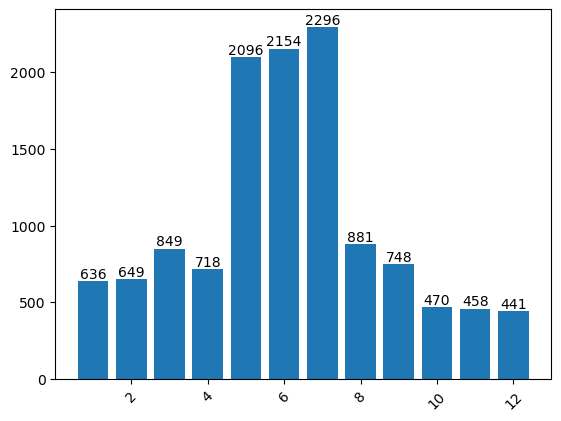

In [79]:
df = make_time_components(data=df, component='month')

# Adding Day Component

##################################################
 Generating Unique Addresses, List of unique day and Number of unique day... 




,address,most_frequent_day,num_day
0,0x0000000000000000000000000000000000000000,[Saturday],7
1,0x0000000000000000000000000000000000000002,[Monday],1
2,0x000000000000000000000000000000000000dead,[Monday],7
3,0x00000000000000447e69651d841bd8d104bed493,"[Wednesday, Thursday]",2
4,0x00000000000000adc04c56bf30ac9d3c0aaf14dc,[Friday],7




##################################################
 Reducing day... 




100%|██████████| 471112/471112 [00:32<00:00, 14463.97it/s]


,address,most_frequent_day,num_day,num_unique_frequent_day
3,0x00000000000000447e69651d841bd8d104bed493,[Wednesday],2,2
11,0x00000000000045166c45af0fc6e4cf31d9e14b9a,[Wednesday],4,3
14,0x00000000000061ad8ee190710508a818ae5325c3,[Wednesday],2,2
21,0x000000000000b396a7ab58af828f99d4ff9ea749,[Wednesday],2,2
22,0x000000000000cb2d80a37898be43579c7b616844,[Thursday],3,2
...,...,...,...,...
3347387,0xfffffff1ac8dcf49f4afd3f90995120e568740f9,[Friday],1,1
3347388,0xffffffff2ba8f66d4e51811c5190992176930278,[Saturday],7,1
3347389,0xffffffffb9059a7285849bafddf324e2c308c164,[Saturday],6,1
3347390,0xfffffffff15abf397da76f1dcc1a1604f45126db,[Friday],7,1




##################################################
 Merging with DF... 


Number of samples without day component: 1088 

Added day...


,Address,Avg_min_between_received_tnx,Avg_min_between_sent_tnx,Sent_tnx,Received_Tnx,Number_of_Created_Contracts,Average_of_Unique_Received_From_Addresses,Average_of_Unique_Sent_To_Addresses,min_value_received,max_value_received,...,avg_val_sent,total_transactions_including_tnx_to_create_contract,total_Ether_sent,total_ether_received,total_ether_balance,Flag,most_frequent_month,num_month,most_frequent_day,num_day
0,0x76e40d0a69fd81826b5eb7d18145626d46eafdef,620934.31,7346.28,9968,2586,0,4,3,0.00,27.19,...,0.00,12554,0.00,115.11,115.11,False,3.00,12.00,Tuesday,7.00
1,0x1c7ae6191fa64e91ba3812164e1c7ac6c4d87f28,4248.69,8.11,33,33,0,2,33,2.00,1315.55,...,138.59,66,4573.53,4573.55,0.02,False,7.00,4.00,Tuesday,7.00
2,0xf0767c8f2255d43447f663412b3bba422d2c3e33,149958793.40,145664.14,7,11,0,10,5,0.01,1.00,...,0.26,18,1.79,1.86,0.07,True,4.00,1.00,Wednesday,5.00
3,0x8babc460731cc581bf7cc2d819069cb747077d55,6552401.59,41584.34,194,251,0,4,193,0.01,0.17,...,0.06,445,12.37,12.68,0.30,True,3.00,12.00,Thursday,7.00
4,0x7d4bf678252c1c85aa46e032bf70e76439ee1708,0.00,0.00,0,0,1,0,0,0.00,0.00,...,0.00,1,0.00,0.00,0.00,True,12.00,1.00,Thursday,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12391,0xaD0C88F3313ABbce2185597E87A15f764e948A46,11538.99,0.00,1,11,0,10,1,0.10,80.00,...,105.04,12,105.04,105.04,0.00,True,9.00,1.00,NaN,NaN
12392,0x64e08d4c26890654e10412dbc2129f1d6595c81f,0.00,31.73,2,1,0,1,2,101.00,101.00,...,50.50,3,101.00,101.00,0.00,False,5.00,1.00,Wednesday,1.00
12393,0x8f51820486fc4a07f0a5bbc3d6e154627a31716b,2847.78,41560.53,4,2,0,2,4,0.01,0.10,...,0.03,6,0.11,0.11,0.00,False,2.00,2.00,Wednesday,3.00
12394,0x0fb275e60e31f663db84194a2fdbae50151d8284,276632550.80,1317.73,37,6,0,2,4,0.00,0.06,...,0.00,43,0.00,0.13,0.13,False,8.00,3.00,Saturday,3.00




##################################################
 Filling Missing Values with Distribution... 


Number of samples without day component: 0 



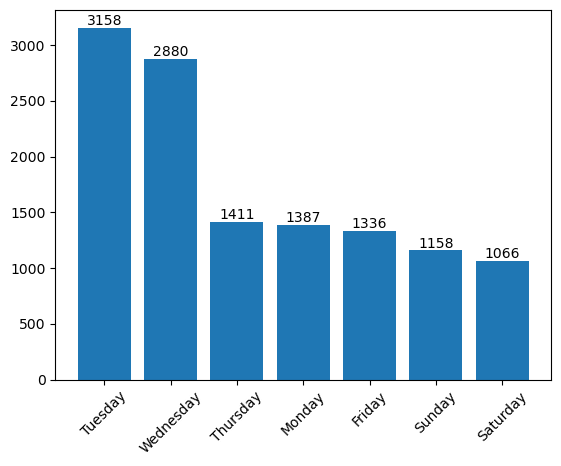

In [80]:
df = make_time_components(data=df, component='day')

# Adding Hour Component

##################################################
 Generating Unique Addresses, List of unique hour and Number of unique hour... 




,address,most_frequent_hour,num_hour
0,0x0000000000000000000000000000000000000000,[5],24
1,0x0000000000000000000000000000000000000002,[22],1
2,0x000000000000000000000000000000000000dead,[10],24
3,0x00000000000000447e69651d841bd8d104bed493,"[23, 0]",2
4,0x00000000000000adc04c56bf30ac9d3c0aaf14dc,[20],24




##################################################
 Reducing hour... 




100%|██████████| 676391/676391 [00:41<00:00, 16145.26it/s]


,address,most_frequent_hour,num_hour,num_unique_frequent_hour
3,0x00000000000000447e69651d841bd8d104bed493,[0],2,2
9,0x0000000000000d9054f605ca65a2647c2b521422,[19],3,3
14,0x00000000000061ad8ee190710508a818ae5325c3,[15],2,2
21,0x000000000000b396a7ab58af828f99d4ff9ea749,[16],2,2
22,0x000000000000cb2d80a37898be43579c7b616844,[20],5,5
...,...,...,...,...
3347385,0xffffff5800b709071d4adc74759ae4b89bef2a9d,[17],14,1
3347386,0xffffffbf3bf3b043a7457e78b4a5313a58dc5d14,[1],4,1
3347387,0xfffffff1ac8dcf49f4afd3f90995120e568740f9,[20],1,1
3347388,0xffffffff2ba8f66d4e51811c5190992176930278,[10],22,1




##################################################
 Merging with DF... 


Number of samples without hour component: 1088 

Added hour...


,Address,Avg_min_between_received_tnx,Avg_min_between_sent_tnx,Sent_tnx,Received_Tnx,Number_of_Created_Contracts,Average_of_Unique_Received_From_Addresses,Average_of_Unique_Sent_To_Addresses,min_value_received,max_value_received,...,total_Ether_sent,total_ether_received,total_ether_balance,Flag,most_frequent_month,num_month,most_frequent_day,num_day,most_frequent_hour,num_hour
0,0x76e40d0a69fd81826b5eb7d18145626d46eafdef,620934.31,7346.28,9968,2586,0,4,3,0.00,27.19,...,0.00,115.11,115.11,False,3.00,12.00,Tuesday,7.00,15.00,24.00
1,0x1c7ae6191fa64e91ba3812164e1c7ac6c4d87f28,4248.69,8.11,33,33,0,2,33,2.00,1315.55,...,4573.53,4573.55,0.02,False,7.00,4.00,Tuesday,7.00,15.00,15.00
2,0xf0767c8f2255d43447f663412b3bba422d2c3e33,149958793.40,145664.14,7,11,0,10,5,0.01,1.00,...,1.79,1.86,0.07,True,4.00,1.00,Wednesday,5.00,17.00,12.00
3,0x8babc460731cc581bf7cc2d819069cb747077d55,6552401.59,41584.34,194,251,0,4,193,0.01,0.17,...,12.37,12.68,0.30,True,3.00,12.00,Thursday,7.00,22.00,24.00
4,0x7d4bf678252c1c85aa46e032bf70e76439ee1708,0.00,0.00,0,0,1,0,0,0.00,0.00,...,0.00,0.00,0.00,True,12.00,1.00,Thursday,1.00,8.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12391,0xaD0C88F3313ABbce2185597E87A15f764e948A46,11538.99,0.00,1,11,0,10,1,0.10,80.00,...,105.04,105.04,0.00,True,9.00,1.00,Tuesday,1.00,NaN,NaN
12392,0x64e08d4c26890654e10412dbc2129f1d6595c81f,0.00,31.73,2,1,0,1,2,101.00,101.00,...,101.00,101.00,0.00,False,5.00,1.00,Wednesday,1.00,19.00,2.00
12393,0x8f51820486fc4a07f0a5bbc3d6e154627a31716b,2847.78,41560.53,4,2,0,2,4,0.01,0.10,...,0.11,0.11,0.00,False,2.00,2.00,Wednesday,3.00,14.00,5.00
12394,0x0fb275e60e31f663db84194a2fdbae50151d8284,276632550.80,1317.73,37,6,0,2,4,0.00,0.06,...,0.00,0.13,0.13,False,8.00,3.00,Saturday,3.00,20.00,8.00




##################################################
 Filling Missing Values with Distribution... 


Number of samples without hour component: 0 



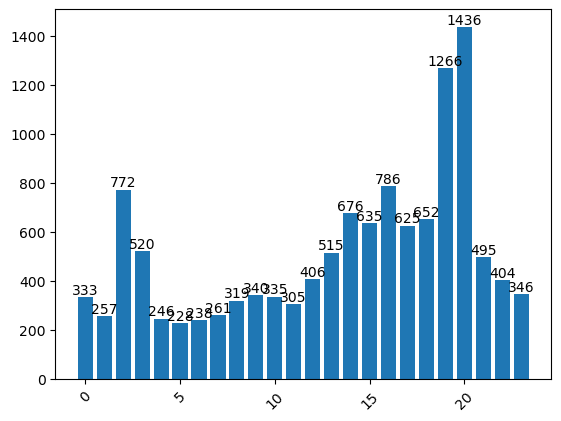

In [81]:
df = make_time_components(data=df, component='hour')

In [82]:
month_mapping = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

df['most_frequent_month'] = df['most_frequent_month'].astype(int).map(month_mapping)
df['num_month'] = df['num_month'].astype('category')

df['most_frequent_day'] = df['most_frequent_day'].astype('category')
df['num_day'] = df['num_day'].astype('category')

df['most_frequent_hour'] = df['most_frequent_hour'].astype('category')
df['num_hour'] = df['num_hour'].astype('category')

display(df)
print(df.dtypes)

,Address,Avg_min_between_received_tnx,Avg_min_between_sent_tnx,Sent_tnx,Received_Tnx,Number_of_Created_Contracts,Average_of_Unique_Received_From_Addresses,Average_of_Unique_Sent_To_Addresses,min_value_received,max_value_received,...,total_Ether_sent,total_ether_received,total_ether_balance,Flag,most_frequent_month,num_month,most_frequent_day,num_day,most_frequent_hour,num_hour
0,0x76e40d0a69fd81826b5eb7d18145626d46eafdef,620934.31,7346.28,9968,2586,0,4,3,0.00,27.19,...,0.00,115.11,115.11,False,March,12.00,Tuesday,7.00,15.00,24.00
1,0x1c7ae6191fa64e91ba3812164e1c7ac6c4d87f28,4248.69,8.11,33,33,0,2,33,2.00,1315.55,...,4573.53,4573.55,0.02,False,July,4.00,Tuesday,7.00,15.00,15.00
2,0xf0767c8f2255d43447f663412b3bba422d2c3e33,149958793.40,145664.14,7,11,0,10,5,0.01,1.00,...,1.79,1.86,0.07,True,April,1.00,Wednesday,5.00,17.00,12.00
3,0x8babc460731cc581bf7cc2d819069cb747077d55,6552401.59,41584.34,194,251,0,4,193,0.01,0.17,...,12.37,12.68,0.30,True,March,12.00,Thursday,7.00,22.00,24.00
4,0x7d4bf678252c1c85aa46e032bf70e76439ee1708,0.00,0.00,0,0,1,0,0,0.00,0.00,...,0.00,0.00,0.00,True,December,1.00,Thursday,1.00,8.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12391,0xaD0C88F3313ABbce2185597E87A15f764e948A46,11538.99,0.00,1,11,0,10,1,0.10,80.00,...,105.04,105.04,0.00,True,September,1.00,Tuesday,1.00,16.00,1.00
12392,0x64e08d4c26890654e10412dbc2129f1d6595c81f,0.00,31.73,2,1,0,1,2,101.00,101.00,...,101.00,101.00,0.00,False,May,1.00,Wednesday,1.00,19.00,2.00
12393,0x8f51820486fc4a07f0a5bbc3d6e154627a31716b,2847.78,41560.53,4,2,0,2,4,0.01,0.10,...,0.11,0.11,0.00,False,February,2.00,Wednesday,3.00,14.00,5.00
12394,0x0fb275e60e31f663db84194a2fdbae50151d8284,276632550.80,1317.73,37,6,0,2,4,0.00,0.06,...,0.00,0.13,0.13,False,August,3.00,Saturday,3.00,20.00,8.00


Address                                                  object
Avg_min_between_received_tnx                            float64
Avg_min_between_sent_tnx                                float64
Sent_tnx                                                  int64
Received_Tnx                                              int64
Number_of_Created_Contracts                               int64
Average_of_Unique_Received_From_Addresses                 int64
Average_of_Unique_Sent_To_Addresses                       int64
min_value_received                                      float64
max_value_received                                      float64
avg_val_received                                        float64
min_val_sent                                            float64
max_val_sent                                            float64
avg_val_sent                                            float64
total_transactions_including_tnx_to_create_contract       int64
total_Ether_sent                        

# Adding total number of transactions

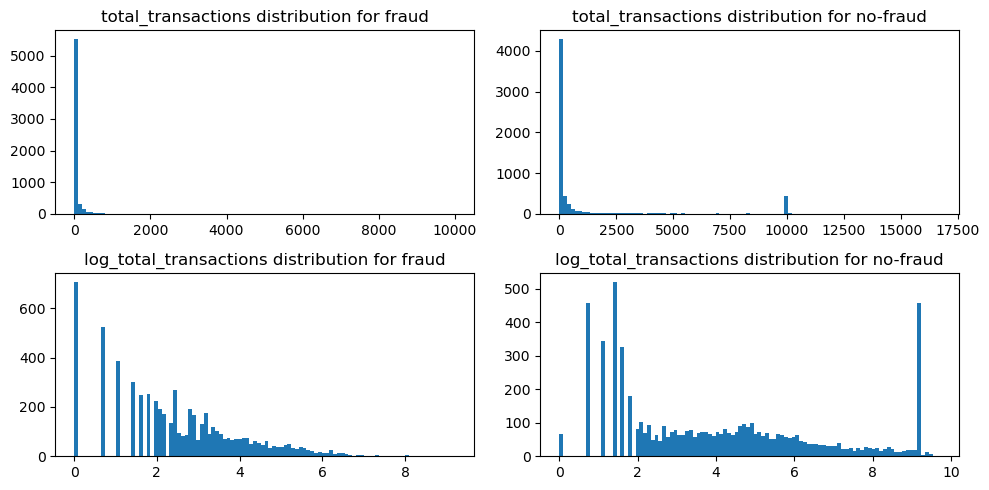

In [83]:
# transaction frequency

df['total_transactions'] = df['Sent_tnx'] + df['Received_Tnx']

# plot results

fig, ax = plt.subplots(2, 2, figsize=(10, 5))

ax[0,0].hist(df[df['Flag']==1]['total_transactions'], bins=100)
ax[0,0].set_title('total_transactions distribution for fraud')
ax[0,1].hist(df[df['Flag']==0]['total_transactions'], bins=100)
ax[0,1].set_title('total_transactions distribution for no-fraud')

# add log of total transaction for better split
df['log_total_transactions'] = np.log(df['total_transactions']).replace([-np.inf, np.inf], 0)

log_total_transactions_fraud = df[df['Flag']==1]['log_total_transactions']
log_total_transactions_nofraud = df[df['Flag']==0]['log_total_transactions']

ax[1,0].hist(log_total_transactions_fraud, bins=100)
ax[1,0].set_title('log_total_transactions distribution for fraud')
ax[1,1].hist(log_total_transactions_nofraud, bins=100)
ax[1,1].set_title('log_total_transactions distribution for no-fraud')

plt.tight_layout()
plt.show()

# Adding gap amt between ether sent, ether received, ether balance

In [84]:
# is there any gap between total ether sent and total ether received and remaining balance?

bal_cond = (df['total_ether_received'] - df['total_Ether_sent']).round(10) != df['total_ether_balance'].round(10)
print('Proportion of Balance Accurately Calculated:', bal_cond.sum() / len(df))
df['total_ether_balance_gap'] = bal_cond
df['total_ether_balance_gap_amt'] = (df['total_ether_received'] - df['total_Ether_sent']) - df['total_ether_balance']

display(df.groupby(['total_ether_balance_gap', 'Flag']).agg({'Flag':'count'}))

Proportion of Balance Accurately Calculated: 0.2563730235559858


Flag
total_ether_balance_gap Flag       
False                   False  4021
                        True   5197
True                    False  2177
                        True   1001

# Adding ratios

In [85]:
''' returns a dictionary of new ratio features and respective variance scores '''

from sklearn.preprocessing import MinMaxScaler

def create_numerical_ratio(list1, list2, data=df, threshold=0.8):

     scaler =  MinMaxScaler()
     var_scores = {}; var_features = {}

     for f1 in list1:
          for f2 in list2:
               if (f1 != f2) and (df[f1].corr(df[f2]) < threshold):
                    # take the variable with highest variance i.e most information/distinct
                    # account for 0 and infinity after taking numerical ratios
                    var1_values = (df[f2] / df[f1]).fillna(0).replace([np.inf, -np.inf], 0).values
                    var2_values = (df[f1] / df[f2]).fillna(0).replace([np.inf, -np.inf], 0).values

                    var1 = scaler.fit_transform(var1_values.reshape(-1,1)).std()
                    var2 = scaler.fit_transform(var2_values.reshape(-1,1)).std()

                    if var1 > var2: 
                         fn = ('Ratio_of_' + f2 + '~' + f1)
                         if fn not in var_scores.keys():
                              var_scores[fn] = var1 ; var_features[fn] = var1_values
                    else:
                         fn = ('Ratio_of_' + f1 + '~' + f2) 
                         if fn not in var_scores.keys():
                              var_scores[fn] = var2 ; var_features[fn] = var2_values
               else:
                    continue
               
     return var_scores, var_features
               

In [86]:
ratio_list = [c for c in df.columns if (df[c].dtype == np.float64) or (df[c].dtype == np.int64)]
ratio_scores, ratio_features = create_numerical_ratio(list1=ratio_list, list2=ratio_list)
top_ratio_features = sorted(ratio_scores, key=lambda x: ratio_scores[x], reverse=True)
if len(top_ratio_features) > 10:
    for r in top_ratio_features[:10]:
        print(r, ' : ', ratio_scores[r])

print('\n')
print('Number of Ratio Features:', len(ratio_scores))

Ratio_of_Average_of_Unique_Sent_To_Addresses~Sent_tnx  :  0.41177330026360137
Ratio_of_max_val_sent~total_Ether_sent  :  0.39791165738919604
Ratio_of_min_val_sent~max_val_sent  :  0.3920777567744808
Ratio_of_min_value_received~max_value_received   :  0.3842090785132195
Ratio_of_avg_val_sent~max_val_sent  :  0.3745818183173819
Ratio_of_min_val_sent~total_Ether_sent  :  0.3743868231249716
Ratio_of_log_total_transactions~total_transactions  :  0.3676248154983912
Ratio_of_log_total_transactions~total_transactions_including_tnx_to_create_contract  :  0.3644868964540789
Ratio_of_avg_val_sent~total_Ether_sent  :  0.36258018060525005
Ratio_of_min_value_received~total_ether_received  :  0.3537289819839417


Number of Ratio Features: 186


# Dimensionality Reduction for Ratio Features

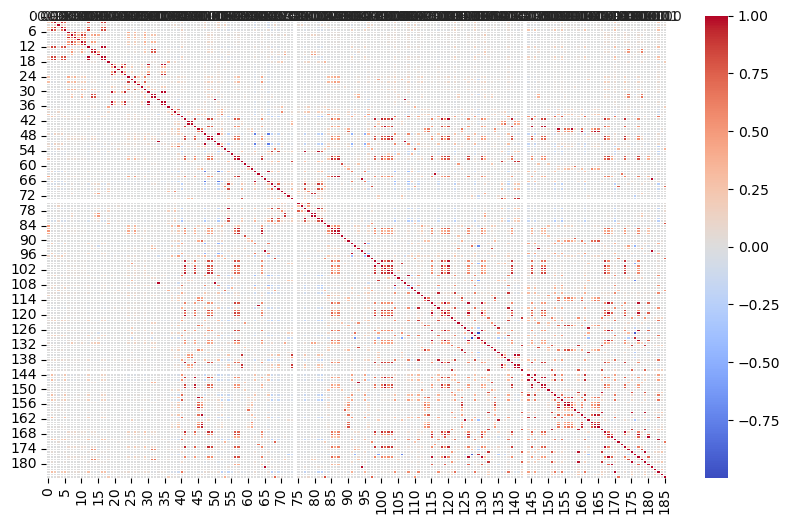

In [87]:
ratio_df = pd.DataFrame(np.array(list(ratio_features.values())).T)
plt.figure(figsize=(10,6))
sns.heatmap(ratio_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.show()

100%|██████████| 186/186 [00:28<00:00,  6.47it/s]


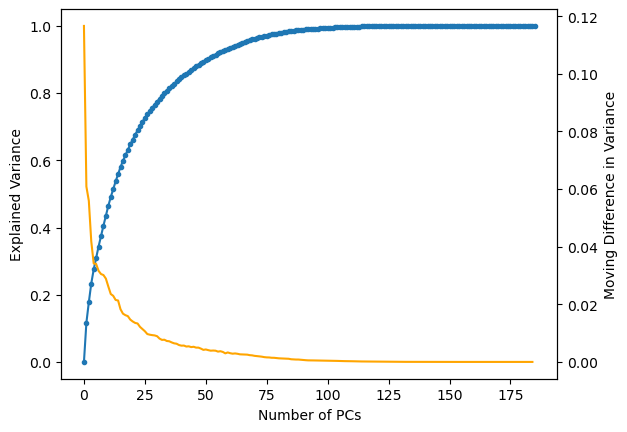

Optimal Number of Principal Components Validated:  66


In [88]:
from sklearn.decomposition import PCA

ratio_df_scaled = StandardScaler().fit_transform(ratio_df)

# finding optimal number of components using some threshold
pca_thresh = 0.95
min_pc, max_pc = 1, ratio_df_scaled.shape[1]

pca_dict = {}
for pc in tqdm(range(max_pc)):
    pca = PCA(n_components=pc)
    pca.fit(ratio_df_scaled)
    pca_variance = sum(pca.explained_variance_ratio_)
    pca_dict[str(pc)] = pca_variance
    
# calculate the moving difference in variance between each epoch
values = list(pca_dict.values())
pca_difference_variance = [values[i] - values[i - 1] for i in range(1, len(values))]

# plot results
f, ax = plt.subplots()
ax.plot(values, marker='.')
ax2 = ax.twinx()
ax2.plot(pca_difference_variance, color='orange')
ax.set_xlabel('Number of PCs')
ax.set_ylabel('Explained Variance')
ax2.set_ylabel('Moving Difference in Variance')
plt.show()

optimal_pc = [k for k, v in pca_dict.items() if v > pca_thresh][0]
optimal_pc = int(optimal_pc)
print('Optimal Number of Principal Components Validated: ', optimal_pc)

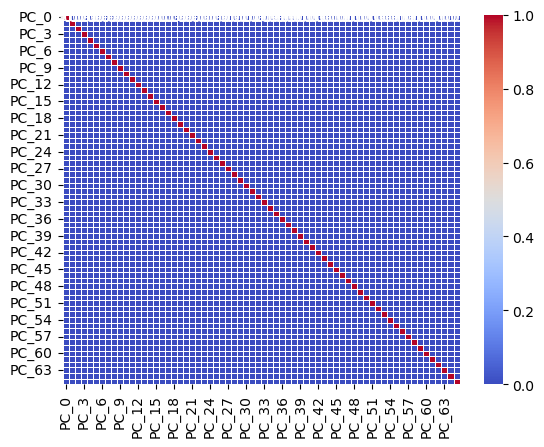

In [89]:
# finalise PC matrix 
del pca 
optimal_pc = int(optimal_pc); pca = PCA(n_components=optimal_pc)

principalComponents = pca.fit_transform(ratio_df_scaled)
pca_cols = []
for i in range(optimal_pc): pca_cols.append(f'PC_{i}')
pca_df = pd.DataFrame(data = principalComponents, columns = pca_cols)

# plot pca correlation matrix (correlation = 0)
sns.heatmap(pca_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.show()

# Preparing the Data

In [90]:
print(df.dtypes, '\n')
print('Number of levels of "most_frequent_month":', len(set(df['most_frequent_month'])))
print('Number of levels of "num_month":', len(set(df['num_month'])))
print('Number of levels of "most_frequent_day":', len(set(df['most_frequent_day'])))
print('Number of levels of "num_day":', len(set(df['num_day'])))
print('Number of levels of "most_frequent_hour":', len(set(df['most_frequent_hour'])))
print('Number of levels of "num_hour":', len(set(df['num_hour'])))
print('Number of levels of "total_ether_balance_gap":', len(set(df['total_ether_balance_gap'])))

Address                                                  object
Avg_min_between_received_tnx                            float64
Avg_min_between_sent_tnx                                float64
Sent_tnx                                                  int64
Received_Tnx                                              int64
Number_of_Created_Contracts                               int64
Average_of_Unique_Received_From_Addresses                 int64
Average_of_Unique_Sent_To_Addresses                       int64
min_value_received                                      float64
max_value_received                                      float64
avg_val_received                                        float64
min_val_sent                                            float64
max_val_sent                                            float64
avg_val_sent                                            float64
total_transactions_including_tnx_to_create_contract       int64
total_Ether_sent                        

# One Hot Encoding Categorical Features

In [91]:
from sklearn.preprocessing import OneHotEncoder

ohe_sparse_item, ohe_sparse_dfs = [], []

for col in df.columns:
    if df[col].dtype in ['category', 'bool', 'object']:
        if col not in ['Address', 'Flag']:
            ohe = OneHotEncoder(handle_unknown='ignore')
            sparse_matrix = ohe.fit_transform(df[[col]]).toarray()
            sparse_df = pd.DataFrame(sparse_matrix, columns=ohe.get_feature_names_out())

            ohe_sparse_item.append(col)
            ohe_sparse_dfs.append(sparse_df)

            del ohe
    
print('Number of sparse dataframes collected: ', len(ohe_sparse_dfs), '\n')
for item, val in zip(ohe_sparse_item, ohe_sparse_dfs): print(f'Dimension of {item}: ', val.shape, '\n')

# merge to form all ohe dataframe
ohe_dfs_merged = pd.concat(ohe_sparse_dfs, axis=1)
ohe_dfs_merged

Number of sparse dataframes collected:  7 

Dimension of most_frequent_month:  (12396, 12) 

Dimension of num_month:  (12396, 12) 

Dimension of most_frequent_day:  (12396, 7) 

Dimension of num_day:  (12396, 7) 

Dimension of most_frequent_hour:  (12396, 24) 

Dimension of num_hour:  (12396, 24) 

Dimension of total_ether_balance_gap:  (12396, 2) 



,most_frequent_month_April,most_frequent_month_August,most_frequent_month_December,most_frequent_month_February,most_frequent_month_January,most_frequent_month_July,most_frequent_month_June,most_frequent_month_March,most_frequent_month_May,most_frequent_month_November,...,num_hour_17.0,num_hour_18.0,num_hour_19.0,num_hour_20.0,num_hour_21.0,num_hour_22.0,num_hour_23.0,num_hour_24.0,total_ether_balance_gap_False,total_ether_balance_gap_True
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00
1,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
2,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00
4,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12391,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
12392,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
12393,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
12394,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00


# Concatenate One-Hot-Encoded Matrix, PCA Matrix and DF

In [92]:
scaled_numerical_df = StandardScaler().fit_transform(df.select_dtypes(include=['int64', 'float64']))
scaled_numerical_df_cols = df.select_dtypes(include=['int64', 'float64']).columns
scaled_numerical_df = pd.DataFrame(scaled_numerical_df)
scaled_numerical_df.columns = scaled_numerical_df_cols

# create sparse dataset
sparse = pd.concat([scaled_numerical_df, ohe_dfs_merged], axis=1)
sparse = pd.concat([sparse, pca_df], axis=1)
sparse = pd.concat([sparse, df[['Address', 'Flag']]], axis=1)
sparse

,Avg_min_between_received_tnx,Avg_min_between_sent_tnx,Sent_tnx,Received_Tnx,Number_of_Created_Contracts,Average_of_Unique_Received_From_Addresses,Average_of_Unique_Sent_To_Addresses,min_value_received,max_value_received,avg_val_received,...,PC_58,PC_59,PC_60,PC_61,PC_62,PC_63,PC_64,PC_65,Address,Flag
0,-0.45,-0.07,7.55,1.42,-0.02,-0.17,-0.12,-0.06,-0.03,-0.07,...,-0.60,0.80,1.01,0.66,0.32,-1.52,0.81,-0.87,0x76e40d0a69fd81826b5eb7d18145626d46eafdef,False
1,-0.46,-0.07,-0.17,-0.20,-0.02,-0.17,-0.05,-0.05,0.15,0.16,...,0.03,-0.22,0.13,0.15,0.03,-0.16,0.11,-0.49,0x1c7ae6191fa64e91ba3812164e1c7ac6c4d87f28,False
2,0.34,-0.06,-0.19,-0.21,-0.02,-0.16,-0.11,-0.06,-0.04,-0.07,...,-0.07,0.10,-0.12,-0.10,-0.05,0.05,-0.09,0.21,0xf0767c8f2255d43447f663412b3bba422d2c3e33,True
3,-0.42,-0.07,-0.05,-0.06,-0.02,-0.17,0.33,-0.06,-0.04,-0.07,...,-0.02,-0.28,0.02,0.16,0.17,-0.12,-0.01,-1.16,0x8babc460731cc581bf7cc2d819069cb747077d55,True
4,-0.46,-0.07,-0.20,-0.22,-0.01,-0.18,-0.12,-0.06,-0.04,-0.07,...,0.56,-0.61,-0.13,-0.02,0.03,0.21,-0.51,0.95,0x7d4bf678252c1c85aa46e032bf70e76439ee1708,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12391,-0.46,-0.07,-0.20,-0.21,-0.02,-0.16,-0.12,-0.05,-0.03,-0.06,...,0.27,-0.04,-0.08,0.07,-0.12,-0.01,0.04,0.38,0xaD0C88F3313ABbce2185597E87A15f764e948A46,True
12392,-0.46,-0.07,-0.20,-0.22,-0.02,-0.17,-0.12,0.15,-0.02,0.09,...,-0.03,0.02,0.04,0.02,0.11,-0.10,-0.08,0.03,0x64e08d4c26890654e10412dbc2129f1d6595c81f,False
12393,-0.46,-0.07,-0.20,-0.22,-0.02,-0.17,-0.11,-0.06,-0.04,-0.07,...,-0.09,0.18,-0.01,0.06,0.02,-0.03,-0.18,0.65,0x8f51820486fc4a07f0a5bbc3d6e154627a31716b,False
12394,1.01,-0.07,-0.17,-0.22,-0.02,-0.17,-0.11,-0.06,-0.04,-0.07,...,-0.06,0.07,-0.10,-0.11,-0.19,0.19,0.12,0.28,0x0fb275e60e31f663db84194a2fdbae50151d8284,False


In [119]:
# create dense dataset
dense = pd.concat([df, pca_df], axis=1)
dense

,Address,Avg_min_between_received_tnx,Avg_min_between_sent_tnx,Sent_tnx,Received_Tnx,Number_of_Created_Contracts,Average_of_Unique_Received_From_Addresses,Average_of_Unique_Sent_To_Addresses,min_value_received,max_value_received,...,PC_56,PC_57,PC_58,PC_59,PC_60,PC_61,PC_62,PC_63,PC_64,PC_65
0,0x76e40d0a69fd81826b5eb7d18145626d46eafdef,620934.31,7346.28,9968,2586,0,4,3,0.00,27.19,...,0.44,-1.31,-0.60,0.80,1.01,0.66,0.32,-1.52,0.81,-0.87
1,0x1c7ae6191fa64e91ba3812164e1c7ac6c4d87f28,4248.69,8.11,33,33,0,2,33,2.00,1315.55,...,0.06,-1.10,0.03,-0.22,0.13,0.15,0.03,-0.16,0.11,-0.49
2,0xf0767c8f2255d43447f663412b3bba422d2c3e33,149958793.40,145664.14,7,11,0,10,5,0.01,1.00,...,0.06,0.12,-0.07,0.10,-0.12,-0.10,-0.05,0.05,-0.09,0.21
3,0x8babc460731cc581bf7cc2d819069cb747077d55,6552401.59,41584.34,194,251,0,4,193,0.01,0.17,...,0.22,-1.36,-0.02,-0.28,0.02,0.16,0.17,-0.12,-0.01,-1.16
4,0x7d4bf678252c1c85aa46e032bf70e76439ee1708,0.00,0.00,0,0,1,0,0,0.00,0.00,...,0.22,-0.44,0.56,-0.61,-0.13,-0.02,0.03,0.21,-0.51,0.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12391,0xaD0C88F3313ABbce2185597E87A15f764e948A46,11538.99,0.00,1,11,0,10,1,0.10,80.00,...,-0.08,0.39,0.27,-0.04,-0.08,0.07,-0.12,-0.01,0.04,0.38
12392,0x64e08d4c26890654e10412dbc2129f1d6595c81f,0.00,31.73,2,1,0,1,2,101.00,101.00,...,0.13,-0.28,-0.03,0.02,0.04,0.02,0.11,-0.10,-0.08,0.03
12393,0x8f51820486fc4a07f0a5bbc3d6e154627a31716b,2847.78,41560.53,4,2,0,2,4,0.01,0.10,...,0.22,-0.10,-0.09,0.18,-0.01,0.06,0.02,-0.03,-0.18,0.65
12394,0x0fb275e60e31f663db84194a2fdbae50151d8284,276632550.80,1317.73,37,6,0,2,4,0.00,0.06,...,-0.23,0.89,-0.06,0.07,-0.10,-0.11,-0.19,0.19,0.12,0.28


# Export Preprocessed Data

In [121]:
sparse.to_csv('merged_sparse_preprocessed.csv')
dense.to_csv('merged_dense_preprocessed.csv')